<a href="https://colab.research.google.com/github/noambassat/SupremeCourtClassifier/blob/main/3_5_Sample_for_New_Model_Prediction_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import re
import pandas as pd
import matplotlib.pyplot as plt
from pandas.api.types import CategoricalDtype
import ast
import joblib

In [6]:
df_full_ra_rap = pd.read_excel("full_ra_rap.xlsx")

In [7]:
for col in df_full_ra_rap.columns:
  print(col)

מספר תיק
מספר החלטות בתיק
שם הליך
שנת פתיחת ההליך
מספר הליך
סוג הליך
פירוט סוג הליך
תיק חסוי
תאריך אירוע אחרון
משך התיק בימים
תאריך הגשה
מתוקן סוג הליך
תאריך יצוא התיק
תאריך יצוא הקובץ
תאריך נרמול הקובץ
שם הקובץ
קישור לתיק
שם גורם שיפוטי
תואר גורם שיפוטי
מספר גורמים שיפוטיים במותב
ID
שם השופט
שם השופט מנורמל
שם משפחה מנורמל
שם פרטי מנורמל
מגדר
לאום
דת
קבוצה דתית
שיוך עדתי
ארץ/איזור לידה
שנת לידה
יישוב מגורים מרכזי בילדות
דירוג חברתי כלכלי של  יישוב מגורים מרכזי בילדות
בית ספר תיכון
סוג החינוך
מוסד חינוך משפטי עיקרי
שנת סיום התואר הראשון במשפטים
סוג השכלה משפטית מתקדמת
מוסד חינוך משפטי מתקדם
שנת קבלת התואר המתקדם
מקום התמחות
שנת הסמכה כעורך/ת דין
המשרה האחרונה טרם המינוי לשיפוט
משרה שיפוטית 1
שם בית המשפט במשרה שיפוטית 1
שנת מינוי למשרה שיפוטית 1
משרה שיפוטית 2
שם בית המשפט במשרה שיפוטית 2
שנת מינוי למשרה שיפוטית 2
משרה שיפוטית 3
שם בית המשפט במשרה שיפוטית 3
שנת מינוי למשרה שיפוטית 3
משרה שיפוטית 4
שם בית המשפט במשרה שיפוטית 4
שנת מינוי למשפרה שיפוטית 4
משרה שיפוטית 5
שם בית המשפט במשרה

In [8]:
df_full_ra_rap["ניתנה החלטה כמבוקש הבקשה"].unique()

array([nan, "['אין מידע', 'אין מידע', 'אין מידע', 'אין מידע']",
       "['אין מידע']",
       "['אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע']",
       "['אין מידע', 'אין מידע']", "['אין מידע', 'אין מידע', 'אין מידע']",
       "['אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע']",
       "['אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע']",
       "['אין מידע', 'אין מידע', '03/05/2022', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע']",
       "['אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע']",
       "['אין מידע', 'אין מידע', '27/03/2022', 'אין מידע', 'אין מידע', 'אין מידע']",
       "['אין מידע', '03/03/2022', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע']",
       "['אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע', 'אין מידע']",
       "['אין מידע', 'אי

נקודה חשובה לציון - בשנים 2000-2001 יש הבדל מהותי בין שם ההליך ומתוכו סוג ההליך, לבין סוג ההליך שנרשם בגוף המסמך עצמו.

In [9]:
df_full_ra_rap

,מספר תיק,מספר החלטות בתיק,שם הליך,שנת פתיחת ההליך,מספר הליך,סוג הליך,פירוט סוג הליך,תיק חסוי,תאריך אירוע אחרון,משך התיק בימים,...,סוג גורם שיפוטי דלמטה,סוג בית משפט דלמטה,מקום בית משפט דלמטה,הליך מאוחד,שמות ההליכים המאוחדים,צדדים נוספים,מספר תיק מלא,מספר השופטים,ניתנה החלטה כמבוקש הבקשה,Year
0,5821/18,2,"ע""פ 5821/18",2018,"ע""פ 5821/18","ע""פ",ערעור פלילי,0.0,2018-11-22,108,...,['שופט'],['מחוזי '],['חיפה'],NaN,NaN,NaN,NaN,NaN,NaN,2018
1,4217/18,10,"ע""פ 4217/18",2018,"ע""פ 4217/18","ע""פ",ערעור פלילי,1.0,1900-01-01,-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
2,4344/18,2,"ע""פ 4344/18",2018,"ע""פ 4344/18","ע""פ",ערעור פלילי,0.0,2019-08-18,439,...,['שופט'],['מחוזי '],['מרכז-לוד'],NaN,NaN,NaN,NaN,NaN,NaN,2018
3,1993/18,4,"ע""פ 1993/18",2018,"ע""פ 1993/18","ע""פ",ערעור פלילי,1.0,1900-01-01,-2,...,NaN,NaN,NaN,1.0,"[['ע""פ 1993/18', 'ע""פ 2017/18']]",NaN,NaN,NaN,NaN,2018
4,4993/18,4,"ע""פ 4993/18",2018,"ע""פ 4993/18","ע""פ",ערעור פלילי,1.0,1900-01-01,-2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20605,7505/21,1,"רע""פ 7505/21 טל גויחמו נ. מדינת ישראל",2021,"רע""פ 7505/21","רע""פ",רשות ערעור פלילי,0.0,2021-11-11,4,...,"['שופט', 'שופט']","['תעבורה', 'מחוזי ']","['פתח תקווה', 'מרכז-לוד']",NaN,NaN,NaN,NaN,NaN,NaN,2021
20606,513/21,3,"רע""פ 513/21 עידנ יהושע נ. מדינת ישראל",2021,"רע""פ 513/21","רע""פ",רשות ערעור פלילי,0.0,2021-03-22,56,...,"['הרכב', 'שופט']","['מחוזי ', 'שלום']","['באר שבע', 'אשקלון']",NaN,NaN,NaN,NaN,NaN,NaN,2021
20607,225/21,1,"רע""פ 225/21 אלקאר דביר בע""מ נ. מדינת ישראל",2021,"רע""פ 225/21","רע""פ",רשות ערעור פלילי,0.0,2021-02-11,30,...,"['שופט', 'שופט']","['מחוזי ', 'עניינים מקומיים']","['תל אביב', 'תל אביב']",NaN,NaN,NaN,NaN,NaN,NaN,2021
20608,4075/21,1,"רע""פ 4075/21 דב הרמנ נ. מדינת ישראל",2021,"רע""פ 4075/21","רע""פ",רשות ערעור פלילי,0.0,2021-06-10,0,...,"['הרכב', 'שופט']","['מחוזי ', 'שלום']","['תל אביב', 'תל אביב']",NaN,NaN,NaN,NaN,NaN,NaN,2021


# Clean Doc's body - נקיון גוף המסמך

In [10]:
print((df_full_ra_rap["גוף המסמך"].iloc[2]))

['פסק דין בתיק ע"פ 4344/18 בבית המשפט העליון בשבתו כבית משפט לערעורים פליליים ע"פ 4344/18 לפני: כבוד השופט נ\' הנדל כבוד השופט ע\' גרוסקופף כבוד השופט א\' שטיין המערער: אשרף גאבר נגד המשיבה: מדינת ישראל ערעור על פסק דינו של בית המשפט המחוזי מרכז-לוד מיום 17.4.2018 בת"פ 58957-05-17 (השופטת ר\' לורך, ס"נ) תאריך הישיבה: ט"ו בתמוז התשע"ט (18.07.2019) בשם המערער: עו"ד ניר שנידרמן בשם המשיבה: עו"ד עדי שגב פסק דין השופט א\' שטיין: 1. הערעור שלפנינו מופנה אל גזר הדין של בית המשפט המחוזי מרכז-לוד בת"פ 58957-05-17 (השופטת ר\' לורך, ס"נ, כתוארה אז) מיום 17.4.2018, אשר השית על המערער – בעקבות הרשעתו במסגרת הסדר טיעון בגרימת חבלה בכוונה מחמירה, עבירה לפי סעיף 329(א)(1) לחוק העונשין, התשל"ז-1977 (להלן: חוק העונשין), ובנשיאת נשק ותחמושת שלא כדין, עבירה לפי סעיף 144(ב) לחוק העונשין – עונשים כדלקמן: 5 שנות מאסר בפועל החל מיום מעצרו, 28.5.2017; 10 חודשי מאסר על תנאי לבל יעבור עבירת אלימות או עבירת נשק מסוג פשע בתוך 3 שנים מיום שחרורו מהמאסר; 6 חודשי מאסר על תנאי לבל יעבור עבירת אלימות או עבירת נשק מסוג 

In [11]:
# פונקציה להמרת טקסט שמופיע כרשימה למחרוזת רגילה
def convert_list_to_string(text):
    if isinstance(text, str) and text.startswith("[") and text.endswith("]"):
        try:
            # מנסה להמיר את התוכן בתוך הסוגריים לרשימה אמיתית
            text_list = ast.literal_eval(text)
            # איחוד המחרוזות לרצף טקסט אחד
            return ' '.join(text_list)
        except (ValueError, SyntaxError):
            return text
    return text

# פונקציה לניקוי התווים המיותרים
def clean_text(text):
    if isinstance(text, list):
        text = ' '.join(text)  # הפיכת רשימה למחרוזת
    elif isinstance(text, str):
        # הסרת תווי רווח מיותרים ותווים מיוחדים
        text = re.sub(r'\n+', ' ', text)  # הסרת שורות חדשות מרובות
        text = re.sub(r'\\n', '', text)   # הסרת תווי newline \n מהטקסט
        text = re.sub(r'\\xa0', ' ', text)  # הסרת תווי \xa0 מהטקסט
        text = re.sub(r'\s+', ' ', text)  # הסרת רווחים מרובים
        return text.strip()
    return text

# הדפסת שורות לא קריאות לפני המרה
print("שורות לא קריאות לפני המרה:")
print(df_full_ra_rap["גוף המסמך"].head())

# המרה של הטקסטים הלא קריאים לטקסטים קריאים ושמירה על הדאטה המקורי
df_full_ra_rap["גוף המסמך"] = df_full_ra_rap["גוף המסמך"].apply(clean_text)

print("\nשורות לאחר המרה:")
print(df_full_ra_rap["גוף המסמך"].head())

# file_path = 'full_final_df_cleaned.csv'
# df_full_ra_rap.to_csv(file_path, index=False, encoding='utf-8')

# print(f"הקובץ נשמר בהצלחה בנתיב: {file_path}")


שורות לא קריאות לפני המרה:
0    ['פסק דין בתיק ע"פ 5821/18 בבית המשפט העליון ב...
1    ['פסק דין בתיק ע"פ 4217/18 בבית המשפט העליון ב...
2    ['פסק דין בתיק ע"פ 4344/18 בבית המשפט העליון ב...
3    ['פסק דין בתיק ע"פ 1993/18 בבית המשפט העליון ב...
4    ['פסק דין בתיק ע"פ 4993/18 בבית המשפט העליון ב...
Name: גוף המסמך, dtype: object

שורות לאחר המרה:
0    ['פסק דין בתיק ע"פ 5821/18 בבית המשפט העליון ב...
1    ['פסק דין בתיק ע"פ 4217/18 בבית המשפט העליון ב...
2    ['פסק דין בתיק ע"פ 4344/18 בבית המשפט העליון ב...
3    ['פסק דין בתיק ע"פ 1993/18 בבית המשפט העליון ב...
4    ['פסק דין בתיק ע"פ 4993/18 בבית המשפט העליון ב...
Name: גוף המסמך, dtype: object


# DCA Files only

In [12]:
years =[2021,2016,2011,2004,2003]

In [13]:
sample_df = df_full_ra_rap[df_full_ra_rap["שנת פתיחת ההליך"].isin(years)]
sample_df

,מספר תיק,מספר החלטות בתיק,שם הליך,שנת פתיחת ההליך,מספר הליך,סוג הליך,פירוט סוג הליך,תיק חסוי,תאריך אירוע אחרון,משך התיק בימים,...,סוג גורם שיפוטי דלמטה,סוג בית משפט דלמטה,מקום בית משפט דלמטה,הליך מאוחד,שמות ההליכים המאוחדים,צדדים נוספים,מספר תיק מלא,מספר השופטים,ניתנה החלטה כמבוקש הבקשה,Year
3301,3819/03,6,"ע""פ 3819/03",2003,"ע""פ 3819/03","ע""פ",ערעור פלילי,0.0,2003-12-10,99,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003
3302,6220/03,4,"ע""פ 6220/03 אמג'ד חמאמרה נ. מדינת ישראל",2003,"ע""פ 6220/03","ע""פ",ערעור פלילי,0.0,2004-06-16,331,...,['שופט'],['מחוזי '],['חיפה'],NaN,NaN,NaN,NaN,NaN,NaN,2003
3303,7837/03,2,"ע""פ 7837/03",2003,"ע""פ 7837/03","ע""פ",ערעור פלילי,0.0,2004-12-15,465,...,['שופט'],['מחוזי '],['תל אביב'],NaN,NaN,NaN,NaN,NaN,NaN,2003
3304,6582/03,2,"ע""פ 6582/03 איגור יבדייב נ. מדינת ישראל",2003,"ע""פ 6582/03","ע""פ",ערעור פלילי,0.0,2004-03-02,225,...,['שופט'],['מחוזי '],['נצרת'],NaN,NaN,NaN,NaN,NaN,NaN,2003
3305,10961/03,1,"ע""פ 10961/03",2003,"ע""פ 10961/03","ע""פ",ערעור פלילי,0.0,2004-09-08,267,...,['שופט'],['מחוזי '],['ירושלים'],NaN,NaN,NaN,NaN,NaN,NaN,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20605,7505/21,1,"רע""פ 7505/21 טל גויחמו נ. מדינת ישראל",2021,"רע""פ 7505/21","רע""פ",רשות ערעור פלילי,0.0,2021-11-11,4,...,"['שופט', 'שופט']","['תעבורה', 'מחוזי ']","['פתח תקווה', 'מרכז-לוד']",NaN,NaN,NaN,NaN,NaN,NaN,2021
20606,513/21,3,"רע""פ 513/21 עידנ יהושע נ. מדינת ישראל",2021,"רע""פ 513/21","רע""פ",רשות ערעור פלילי,0.0,2021-03-22,56,...,"['הרכב', 'שופט']","['מחוזי ', 'שלום']","['באר שבע', 'אשקלון']",NaN,NaN,NaN,NaN,NaN,NaN,2021
20607,225/21,1,"רע""פ 225/21 אלקאר דביר בע""מ נ. מדינת ישראל",2021,"רע""פ 225/21","רע""פ",רשות ערעור פלילי,0.0,2021-02-11,30,...,"['שופט', 'שופט']","['מחוזי ', 'עניינים מקומיים']","['תל אביב', 'תל אביב']",NaN,NaN,NaN,NaN,NaN,NaN,2021
20608,4075/21,1,"רע""פ 4075/21 דב הרמנ נ. מדינת ישראל",2021,"רע""פ 4075/21","רע""פ",רשות ערעור פלילי,0.0,2021-06-10,0,...,"['הרכב', 'שופט']","['מחוזי ', 'שלום']","['תל אביב', 'תל אביב']",NaN,NaN,NaN,NaN,NaN,NaN,2021


In [14]:
sample_df["שנת פתיחת ההליך"].unique()

array([2003, 2004, 2011, 2016, 2021])

In [15]:
sample_df = sample_df[sample_df["סוג הליך"]=='רע"פ']
# בדיקה אם בעמודת "גוף המסמך" קיימת המילה "רע"פ"
contains_raap = sample_df["גוף המסמך"].str.contains('רע"פ', na=False)

# ספירה של כמה מסמכים מכילים את המילה רע"פ וכמה לא
count_yes = contains_raap.sum()
count_no = len(contains_raap) - count_yes

# הדפסת הספירה
print(f"מספר המסמכים שמכילים את המילה 'רע\"פ': {count_yes}")
print(f"מספר המסמכים שלא מכילים את המילה 'רע\"פ': {count_no}")

# סינון הדאטה לשמירת רק המסמכים שכן מכילות את המילה
sample_df = sample_df[contains_raap]

# שמירה לקובץ חדש אם יש צורך
output_file = "filtered_sample_with_raap.csv"
sample_df.to_csv(output_file, index=False, encoding="utf-8")
print(f"הדאטה המסונן נשמר לקובץ: '{output_file}'")


מספר המסמכים שמכילים את המילה 'רע"פ': 1767
מספר המסמכים שלא מכילים את המילה 'רע"פ': 90
הדאטה המסונן נשמר לקובץ: 'filtered_sample_with_raap.csv'


In [16]:
sample_df = sample_df[
    (sample_df["סוג הליך"] == 'רע"פ') &
    (sample_df["מספר הליך"].str.contains('רע"פ', na=False))
]
sample_df

,מספר תיק,מספר החלטות בתיק,שם הליך,שנת פתיחת ההליך,מספר הליך,סוג הליך,פירוט סוג הליך,תיק חסוי,תאריך אירוע אחרון,משך התיק בימים,...,סוג גורם שיפוטי דלמטה,סוג בית משפט דלמטה,מקום בית משפט דלמטה,הליך מאוחד,שמות ההליכים המאוחדים,צדדים נוספים,מספר תיק מלא,מספר השופטים,ניתנה החלטה כמבוקש הבקשה,Year
3835,1774/03,3,"רע""פ 1774/03",2003,"רע""פ 1774/03","רע""פ",רשות ערעור פלילי,0.0,2003-04-28,66,...,"['הרכב', 'שופט']","['מחוזי ', 'שלום']","['תל אביב', 'רחובות']",NaN,NaN,NaN,NaN,NaN,NaN,2003
3836,2817/03,1,"רע""פ 2817/03",2003,"רע""פ 2817/03","רע""פ",רשות ערעור פלילי,0.0,2003-04-14,24,...,['הרכב'],['מחוזי '],['תל אביב'],NaN,NaN,NaN,NaN,NaN,NaN,2003
3837,5584/03,5,"רע""פ 5584/03 מאיר פינטו נ. עיריית חיפה",2003,"רע""פ 5584/03","רע""פ",רשות ערעור פלילי,0.0,2004-12-01,528,...,"['שופט', 'שופט']","['מחוזי ', 'שלום']","['חיפה', 'חיפה']",NaN,NaN,NaN,NaN,NaN,NaN,2003
3839,7056/03,1,"רע""פ 7056/03 משה גולברי נ. מדינת ישראל",2003,"רע""פ 7056/03","רע""פ",רשות ערעור פלילי,0.0,2003-08-10,5,...,['שופט'],['מחוזי '],['תל אביב'],NaN,NaN,NaN,NaN,NaN,NaN,2003
3840,3438/03,9,"רע""פ 3438/03 הראל נופ נ. מדינת ישראל",2003,"רע""פ 3438/03","רע""פ",רשות ערעור פלילי,0.0,2003-11-10,192,...,"['הרכב', 'שופט']","['מחוזי ', 'שלום']","['תל אביב', 'תל אביב']",NaN,NaN,NaN,NaN,NaN,NaN,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20605,7505/21,1,"רע""פ 7505/21 טל גויחמו נ. מדינת ישראל",2021,"רע""פ 7505/21","רע""פ",רשות ערעור פלילי,0.0,2021-11-11,4,...,"['שופט', 'שופט']","['תעבורה', 'מחוזי ']","['פתח תקווה', 'מרכז-לוד']",NaN,NaN,NaN,NaN,NaN,NaN,2021
20606,513/21,3,"רע""פ 513/21 עידנ יהושע נ. מדינת ישראל",2021,"רע""פ 513/21","רע""פ",רשות ערעור פלילי,0.0,2021-03-22,56,...,"['הרכב', 'שופט']","['מחוזי ', 'שלום']","['באר שבע', 'אשקלון']",NaN,NaN,NaN,NaN,NaN,NaN,2021
20607,225/21,1,"רע""פ 225/21 אלקאר דביר בע""מ נ. מדינת ישראל",2021,"רע""פ 225/21","רע""פ",רשות ערעור פלילי,0.0,2021-02-11,30,...,"['שופט', 'שופט']","['מחוזי ', 'עניינים מקומיים']","['תל אביב', 'תל אביב']",NaN,NaN,NaN,NaN,NaN,NaN,2021
20608,4075/21,1,"רע""פ 4075/21 דב הרמנ נ. מדינת ישראל",2021,"רע""פ 4075/21","רע""פ",רשות ערעור פלילי,0.0,2021-06-10,0,...,"['הרכב', 'שופט']","['מחוזי ', 'שלום']","['תל אביב', 'תל אביב']",NaN,NaN,NaN,NaN,NaN,NaN,2021


In [17]:
sample_df.shape[0]

1767

# Drop null

In [18]:
sample_df[["גוף המסמך"]].dropna(how='any', ignore_index=True,inplace=True)
sample_df[["מספר הליך","שם הליך"]].dropna(how='all', ignore_index=True,inplace=True)
sample_df[["מספר הליך","שם הליך"]].drop_duplicates(inplace=True, ignore_index=True)
sample_df

<ipython-input-18-9f43abb7fdde>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df[["גוף המסמך"]].dropna(how='any', ignore_index=True,inplace=True)
<ipython-input-18-9f43abb7fdde>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df[["מספר הליך","שם הליך"]].dropna(how='all', ignore_index=True,inplace=True)
<ipython-input-18-9f43abb7fdde>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_df[["מספר הליך","שם הליך"]].d

,מספר תיק,מספר החלטות בתיק,שם הליך,שנת פתיחת ההליך,מספר הליך,סוג הליך,פירוט סוג הליך,תיק חסוי,תאריך אירוע אחרון,משך התיק בימים,...,סוג גורם שיפוטי דלמטה,סוג בית משפט דלמטה,מקום בית משפט דלמטה,הליך מאוחד,שמות ההליכים המאוחדים,צדדים נוספים,מספר תיק מלא,מספר השופטים,ניתנה החלטה כמבוקש הבקשה,Year
3835,1774/03,3,"רע""פ 1774/03",2003,"רע""פ 1774/03","רע""פ",רשות ערעור פלילי,0.0,2003-04-28,66,...,"['הרכב', 'שופט']","['מחוזי ', 'שלום']","['תל אביב', 'רחובות']",NaN,NaN,NaN,NaN,NaN,NaN,2003
3836,2817/03,1,"רע""פ 2817/03",2003,"רע""פ 2817/03","רע""פ",רשות ערעור פלילי,0.0,2003-04-14,24,...,['הרכב'],['מחוזי '],['תל אביב'],NaN,NaN,NaN,NaN,NaN,NaN,2003
3837,5584/03,5,"רע""פ 5584/03 מאיר פינטו נ. עיריית חיפה",2003,"רע""פ 5584/03","רע""פ",רשות ערעור פלילי,0.0,2004-12-01,528,...,"['שופט', 'שופט']","['מחוזי ', 'שלום']","['חיפה', 'חיפה']",NaN,NaN,NaN,NaN,NaN,NaN,2003
3839,7056/03,1,"רע""פ 7056/03 משה גולברי נ. מדינת ישראל",2003,"רע""פ 7056/03","רע""פ",רשות ערעור פלילי,0.0,2003-08-10,5,...,['שופט'],['מחוזי '],['תל אביב'],NaN,NaN,NaN,NaN,NaN,NaN,2003
3840,3438/03,9,"רע""פ 3438/03 הראל נופ נ. מדינת ישראל",2003,"רע""פ 3438/03","רע""פ",רשות ערעור פלילי,0.0,2003-11-10,192,...,"['הרכב', 'שופט']","['מחוזי ', 'שלום']","['תל אביב', 'תל אביב']",NaN,NaN,NaN,NaN,NaN,NaN,2003
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20605,7505/21,1,"רע""פ 7505/21 טל גויחמו נ. מדינת ישראל",2021,"רע""פ 7505/21","רע""פ",רשות ערעור פלילי,0.0,2021-11-11,4,...,"['שופט', 'שופט']","['תעבורה', 'מחוזי ']","['פתח תקווה', 'מרכז-לוד']",NaN,NaN,NaN,NaN,NaN,NaN,2021
20606,513/21,3,"רע""פ 513/21 עידנ יהושע נ. מדינת ישראל",2021,"רע""פ 513/21","רע""פ",רשות ערעור פלילי,0.0,2021-03-22,56,...,"['הרכב', 'שופט']","['מחוזי ', 'שלום']","['באר שבע', 'אשקלון']",NaN,NaN,NaN,NaN,NaN,NaN,2021
20607,225/21,1,"רע""פ 225/21 אלקאר דביר בע""מ נ. מדינת ישראל",2021,"רע""פ 225/21","רע""פ",רשות ערעור פלילי,0.0,2021-02-11,30,...,"['שופט', 'שופט']","['מחוזי ', 'עניינים מקומיים']","['תל אביב', 'תל אביב']",NaN,NaN,NaN,NaN,NaN,NaN,2021
20608,4075/21,1,"רע""פ 4075/21 דב הרמנ נ. מדינת ישראל",2021,"רע""פ 4075/21","רע""פ",רשות ערעור פלילי,0.0,2021-06-10,0,...,"['הרכב', 'שופט']","['מחוזי ', 'שלום']","['תל אביב', 'תל אביב']",NaN,NaN,NaN,NaN,NaN,NaN,2021


In [19]:
cut_sample_df = sample_df[["גוף המסמך","מספר הליך","שם הליך","שנת פתיחת ההליך"]].reset_index()
cut_sample_df

,index,גוף המסמך,מספר הליך,שם הליך,שנת פתיחת ההליך
0,3835,"['החלטה בתיק רע""פ 1774/03 בבית המשפט העליון בי...","רע""פ 1774/03","רע""פ 1774/03",2003
1,3836,"['החלטה בתיק רע""פ 2817/03 בבית המשפט העליון רע...","רע""פ 2817/03","רע""פ 2817/03",2003
2,3837,"['פסק-דין בתיק רע""פ 5584/03 בבית המשפט העליון ...","רע""פ 5584/03","רע""פ 5584/03 מאיר פינטו נ. עיריית חיפה",2003
3,3839,"['החלטה בתיק רע""פ 7056/03 בבית המשפט העליון רע...","רע""פ 7056/03","רע""פ 7056/03 משה גולברי נ. מדינת ישראל",2003
4,3840,"['החלטה בתיק רע""פ 3438/03 בבית המשפט העליון רע...","רע""פ 3438/03","רע""פ 3438/03 הראל נופ נ. מדינת ישראל",2003
...,...,...,...,...,...
1762,20605,"['החלטה בתיק רע""פ 7505/21 בבית המשפט העליון רע...","רע""פ 7505/21","רע""פ 7505/21 טל גויחמו נ. מדינת ישראל",2021
1763,20606,"['החלטה בתיק רע""פ 513/21 בבית המשפט העליון רע""...","רע""פ 513/21","רע""פ 513/21 עידנ יהושע נ. מדינת ישראל",2021
1764,20607,"['החלטה בתיק רע""פ 225/21 בבית המשפט העליון רע""...","רע""פ 225/21","רע""פ 225/21 אלקאר דביר בע""מ נ. מדינת ישראל",2021
1765,20608,"['החלטה בתיק רע""פ 4075/21 בבית המשפט העליון רע...","רע""פ 4075/21","רע""פ 4075/21 דב הרמנ נ. מדינת ישראל",2021


In [20]:
cut_sample_df.to_csv("cut_sample_df.csv", index=False, encoding='utf-8')

# Cut missing ending files

## FIX THIS!!!


In [21]:
# הגדרת פונקציה לעיצוב טקסט
def format_text(text, line_length=80):
    """
    פורמט טקסט כך שיהיה נוח לקריאה עם שורות שאורכן מוגבל.
    """
    import textwrap
    return "\n".join(textwrap.wrap(text, width=line_length))


In [22]:
# ביטויים לבדיקה
keywords = ["העותק כפוף לשינויי עריכה וניסוח", "העתק מתאים", 'ניתנההיום', 'ניתןהיום', 'ניתן היום', 'ניתנה היום',
            "העתקמתאים", "מזכיר ראשי", "supreme.court.gov.il", "מרכז מידע", "מרכזמידע"]

# בדיקה אילו שורות מכילות אחד מהביטויים
rows_with_keyword = cut_sample_df["גוף המסמך"].apply(
    lambda x: any(keyword in x for keyword in keywords) if isinstance(x, str) else False
)

# סינון שורות שלא מכילות את הביטוי
filtered_data = cut_sample_df[rows_with_keyword]

# הדפסת מספר השורות שנמחקו
num_removed = len(cut_sample_df) - len(filtered_data)  # **שונה לחישוב מדויק**
print(f"\nמספר השורות שנמחקו: {num_removed}")

# **שינוי לצורך סעיף 6**: בדיקה אם נותרו ערכים חסרים בעמודת "גוף המסמך"
missing_values_count = filtered_data["גוף המסמך"].isna().sum()
if missing_values_count > 0:
    print(f"\nנותרו {missing_values_count} ערכים חסרים בעמודת 'גוף המסמך' לאחר סינון.")
else:
    print("\nאין ערכים חסרים בעמודת 'גוף המסמך' לאחר סינון.")

# שמירת הנתונים המסוננים לקובץ חדש
filtered_data.to_csv("new_filtered_data.csv", index=False, encoding='utf-8')
print("\nהנתונים המסוננים נשמרו לקובץ: 'new_filtered_data.csv'")

# עדכון הטבלה המקורית
cut_sample_df = filtered_data.copy()  # **שונה להעתקה בטוחה**



מספר השורות שנמחקו: 20

אין ערכים חסרים בעמודת 'גוף המסמך' לאחר סינון.

הנתונים המסוננים נשמרו לקובץ: 'new_filtered_data.csv'


In [23]:
# פונקציה לחיתוך הטקסט בהתאם לכללים
def trim_text(text):
    min_length = 500  # אורך מינימלי לשמירה
    last_sen = 30     # מספר תווים להסרה מסוף הטקסט

    # שמירת אורך מקורי לאבחון
    original_length = len(text)

    # הסרת מספר תווים מסוף הטקסט
    text = text[:-last_sen]

    # חיתוך ל-min_length האחרונים אם הטקסט ארוך יותר מהמינימום
    if len(text) > min_length:
        text = text[-min_length:]

    return text

# הסרת שורות עם ערכים חסרים בעמודת "גוף המסמך"
cut_sample_df = cut_sample_df.dropna(subset=["גוף המסמך"]).copy()

# חיתוך הטקסטים בעמודת "גוף המסמך"
cut_sample_df["גוף המסמך חתוך"] = cut_sample_df["גוף המסמך"].apply(trim_text)

# שמירת האינדקס המקורי
cut_sample_df.reset_index(inplace=True, drop=False)  # שונה להבטחת שמירת אינדקס מקורי


In [24]:
cut_sample_df.head()


,level_0,index,גוף המסמך,מספר הליך,שם הליך,שנת פתיחת ההליך,גוף המסמך חתוך
0,0,3835,"['החלטה בתיק רע""פ 1774/03 בבית המשפט העליון בי...","רע""פ 1774/03","רע""פ 1774/03",2003,"שעמדה בבסיסההחלטה לדחות את עיכוב הביצוע, עומדת..."
1,1,3836,"['החלטה בתיק רע""פ 2817/03 בבית המשפט העליון רע...","רע""פ 2817/03","רע""פ 2817/03",2003,"רשות ערעור עלפסק-דינו של בית המשפט המחוזי, והו..."
2,3,3839,"['החלטה בתיק רע""פ 7056/03 בבית המשפט העליון רע...","רע""פ 7056/03","רע""פ 7056/03 משה גולברי נ. מדינת ישראל",2003,שכבר ריצה בעבר עונש מאסר. העבירות בהן הורשע בו...
3,4,3840,"['החלטה בתיק רע""פ 3438/03 בבית המשפט העליון רע...","רע""פ 3438/03","רע""פ 3438/03 הראל נופ נ. מדינת ישראל",2003,"['החלטה בתיק רע""פ 3438/03 בבית המשפט העליון רע..."
4,5,3841,"['החלטה בתיק רע""פ 10314/03 בבית המשפט העליון ר...","רע""פ 10314/03","רע""פ 10314/03 מוחמד גאלולי נ. מדינת ישראל",2003,"הצריכותלעניין. עונש זה הוא, כאמור, עונש מתון ..."


# Embedding

In [25]:
from transformers import AutoTokenizer, AutoModel
import numpy as np
import joblib
import pandas as pd

# טעינת המודל והטוקנייזר
tokenizer = AutoTokenizer.from_pretrained("dean-ai/sentence_transformer_Legal-heBERT")
model = AutoModel.from_pretrained("dean-ai/sentence_transformer_Legal-heBERT")

# פונקציה שמקבלת טקסט ומחזירה את האימבדינג כוקטור
def get_embeddings(text):
    inputs = tokenizer(text, return_tensors="pt", padding=True, truncation=True, max_length=512)
    outputs = model(**inputs)
    embeddings = outputs.last_hidden_state.mean(dim=1).detach().numpy()
    return embeddings[0]

# בדיקה אם עמודת "גוף המסמך חתוך" קיימת ומכילה ערכים תקינים
if "גוף המסמך חתוך" not in cut_sample_df.columns or cut_sample_df["גוף המסמך חתוך"].isna().all():
    raise ValueError("עמודת 'גוף המסמך חתוך' חסרה או ריקה. יש לוודא חיתוך טקסטים תקין לפני המשך.")

# חישוב האימבדינגים עבור כל שורה בעמודת "גוף המסמך חתוך"
print("מתחילים לחשב אימבדינגים על גוף המסמך החתוך...")
embeddings_new = np.array([get_embeddings(text) for text in cut_sample_df["גוף המסמך חתוך"]])
print("אימבדינגים חושבו בהצלחה!")


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/1.26k [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/1.07M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.86M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/678 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

מתחילים לחשב אימבדינגים על גוף המסמך החתוך...
אימבדינגים חושבו בהצלחה!



# Model prediction

In [36]:
# טוען את המודל
classifier = joblib.load("2_classifier_model_double_trained.pkl")
print("המודל נטען בהצלחה.")

# חיזוי הסתברויות
print("מתחילים לחזות הסתברויות...")
predicted_probabilities = classifier.predict_proba(embeddings_new)[:, 1]
print("הסתברויות נחזו בהצלחה!")

# הוספת עמודת ההסתברויות
cut_sample_df["predicted_probability"] = predicted_probabilities



# יצירת תחזיות לפי המודל המקורי (ללא שימוש בטרשהולד מותאם)
cut_sample_df["prediction_original_model"] = classifier.predict(embeddings_new)

# **תוספת סעיף 4**: בדיקת התפלגות התחזיות
class_distribution = cut_sample_df["prediction_original_model"].value_counts()
print("\nכמות Class 0 ו-Class 1 (לפי המודל המקורי):")
print(class_distribution)

# בדיקת התפלגות נורמלית
normalized_distribution = cut_sample_df["prediction_original_model"].value_counts(normalize=True)
print("\nהתפלגות נורמלית של Class 0 ו-Class 1 (לפי המודל המקורי):")
print(normalized_distribution)


# שמירה של התחזיות והנתונים לקובץ Excel
output_file = "2_full_data_with_predictions.xlsx"
cut_sample_df.to_excel(output_file, index=False, engine="openpyxl")
print(f"הטבלה המלאה עם הפרדיקציות נשמרה בקובץ: '{output_file}'")


המודל נטען בהצלחה.
מתחילים לחזות הסתברויות...
הסתברויות נחזו בהצלחה!

כמות Class 0 ו-Class 1 (לפי המודל המקורי):
prediction_original_model
0    1551
1     196
Name: count, dtype: int64

התפלגות נורמלית של Class 0 ו-Class 1 (לפי המודל המקורי):
prediction_original_model
0    0.887808
1    0.112192
Name: proportion, dtype: float64
הטבלה המלאה עם הפרדיקציות נשמרה בקובץ: '2_full_data_with_predictions.xlsx'



# Analysis

In [37]:
# ווידוא שקיימת עמודת שנה
if "שנת פתיחת ההליך" not in cut_sample_df.columns:
    raise ValueError("עמודת 'שנת פתיחת ההליך' חסרה בדאטה. יש לוודא שהמידע קיים לפני המשך.")

# בדיקת כמות הערכים לכל שנה
year_counts = cut_sample_df["שנת פתיחת ההליך"].value_counts().sort_index()
print("\nNumber of values for each year:")
print(year_counts)

# יצירת טבלת התפלגות
class_distribution_by_year = cut_sample_df.groupby("שנת פתיחת ההליך")["prediction_original_model"].value_counts(normalize=True).unstack(fill_value=0)

# המרה לאחוזים
class_distribution_by_year = class_distribution_by_year * 100

# הדפסת התפלגות הכיתות לפי שנה
print("\nהתפלגות הכיתות לפי תחזיות המודל (%):")
print(class_distribution_by_year)

# שמירה לקובץ Excel
output_file = "3_no_treshold_class_distribution_by_year.xlsx"
class_distribution_by_year.to_excel(output_file, engine="openpyxl")
print(f"\nהתפלגות הכיתות נשמרה בקובץ: {output_file}")



Number of values for each year:
שנת פתיחת ההליך
2003    360
2004    435
2011    420
2016    306
2021    226
Name: count, dtype: int64

התפלגות הכיתות לפי תחזיות המודל (%):
prediction_original_model          0          1
שנת פתיחת ההליך                                
2003                       88.333333  11.666667
2004                       87.816092  12.183908
2011                       87.380952  12.619048
2016                       89.542484  10.457516
2021                       92.920354   7.079646

התפלגות הכיתות נשמרה בקובץ: 3_no_treshold_class_distribution_by_year.xlsx


In [38]:
import matplotlib.pyplot as plt
from matplotlib import rcParams

# הגדרת פונט
rcParams['font.family'] = 'DejaVu Sans'  # מתאים כברירת מחדל

def plot_probability_distribution_separate_by_year(df, year_column, probability_column, bins=50):
    """
    Displays a separate histogram for each year of the probability distribution.

    Parameters:
    df: pandas.DataFrame - The data table.
    year_column: str - The column name representing the year.
    probability_column: str - The column name representing the probabilities.
    bins: int - The number of bins in the histogram.
    """
    # Check if the columns exist
    if year_column not in df.columns or probability_column not in df.columns:
        raise ValueError(f"Columns {year_column} or {probability_column} are missing in the DataFrame.")

    # Get unique years
    unique_years = sorted(df[year_column].dropna().unique())

    # Create separate histograms for each year
    for year in unique_years:
        plt.figure(figsize=(10, 6))
        plt.hist(
            df[df[year_column] == year][probability_column],
            bins=bins,
            alpha=0.7,
            color="blue",
            edgecolor="black"
        )

        # Set graph labels and titles
        plt.title(f"Probability Distribution for Year {year}", fontsize=16, loc='center')
        plt.xlabel("Predicted Probability", fontsize=14)
        plt.ylabel("Frequency", fontsize=14)
        plt.xlim(0, 1)  # Probabilities always between 0 and 1
        plt.grid(True, linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()


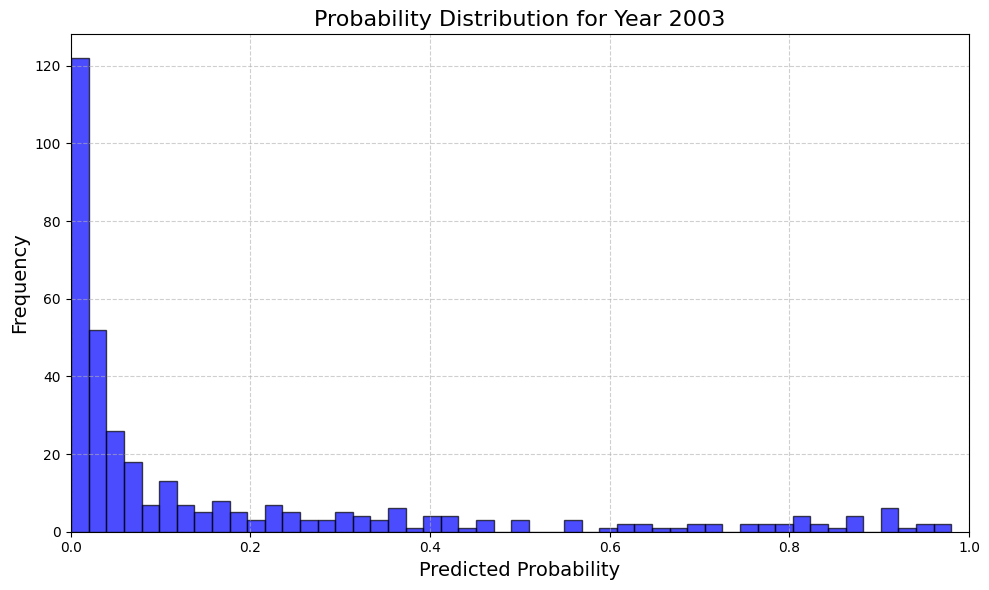

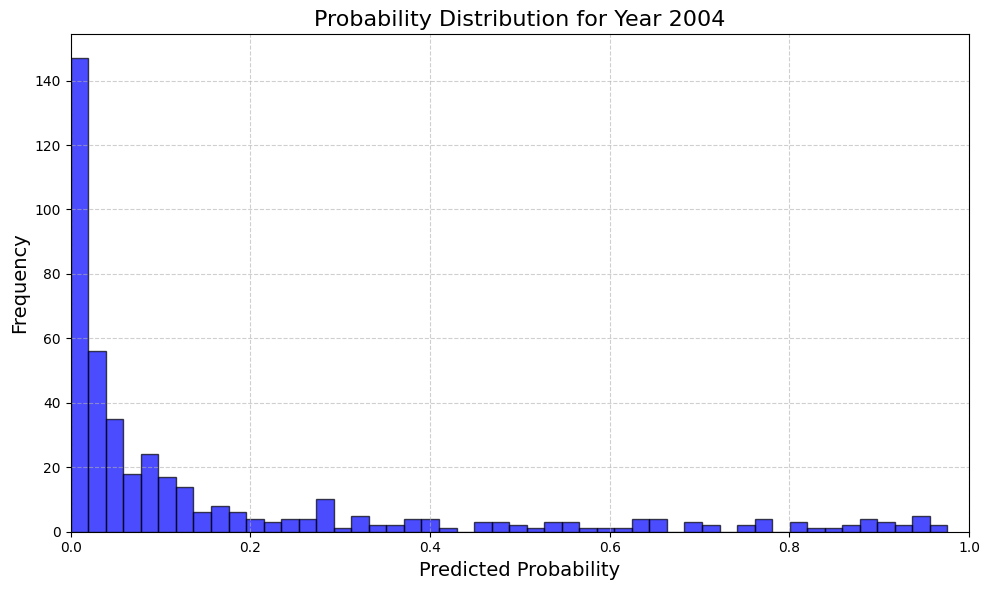

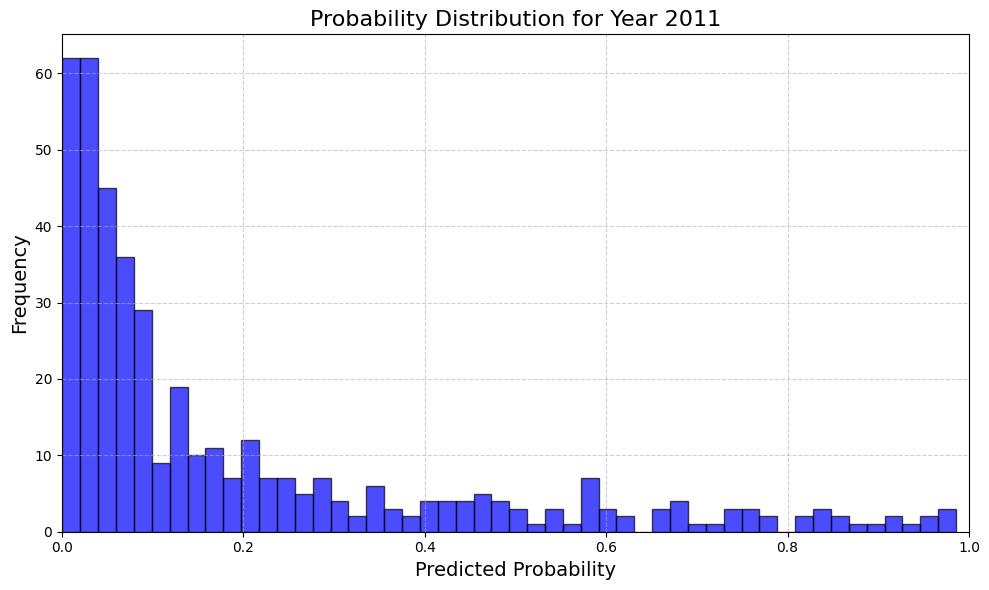

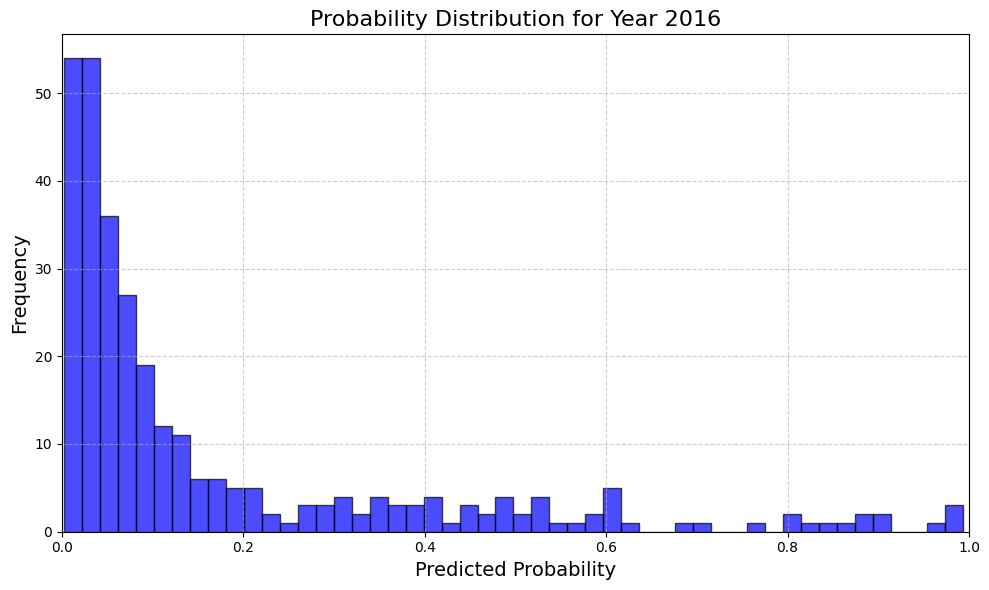

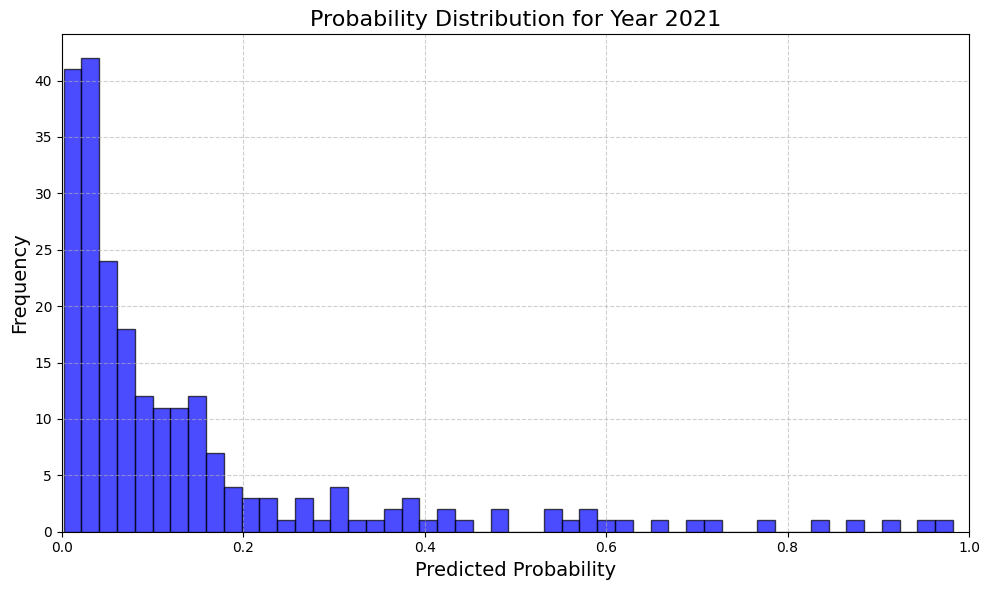

In [39]:
# ווידוא שעומדת "שנת פתיחת ההליך" קיימת
if "שנת פתיחת ההליך" not in cut_sample_df.columns:
    raise ValueError("עמודת 'שנת פתיחת ההליך' חסרה ב-DataFrame.")

# קריאה לפונקציה להצגת גרף נפרד לכל שנה
plot_probability_distribution_separate_by_year(cut_sample_df, "שנת פתיחת ההליך", "predicted_probability")


Undersampled model

In [32]:
# # טוען את המודל
# classifier = joblib.load("classifier_model_second_undersampled.pkl")
# print("המודל נטען בהצלחה.")

# # חיזוי הסתברויות
# print("מתחילים לחזות הסתברויות...")
# predicted_probabilities = classifier.predict_proba(embeddings_new)[:, 1]
# print("הסתברויות נחזו בהצלחה!")

# # הוספת עמודת ההסתברויות
# cut_sample_df["predicted_probability"] = predicted_probabilities

# # שימוש בסף החלטה מותאם
# threshold = 0.1
# cut_sample_df["prediction_custom_threshold"] = (predicted_probabilities >= threshold).astype(int)

# # יצירת תחזיות לפי המודל המקורי (ללא שימוש בטרשהולד מותאם)
# cut_sample_df["prediction_original_model"] = classifier.predict(embeddings_new)

# # **תוספת סעיף 4**: בדיקת התפלגות התחזיות
# class_distribution = cut_sample_df["prediction_original_model"].value_counts()
# print("\nכמות Class 0 ו-Class 1 (לפי המודל המקורי):")
# print(class_distribution)

# # בדיקת התפלגות נורמלית
# normalized_distribution = cut_sample_df["prediction_original_model"].value_counts(normalize=True)
# print("\nהתפלגות נורמלית של Class 0 ו-Class 1 (לפי המודל המקורי):")
# print(normalized_distribution)

# # בדיקת התפלגות התחזיות לפי סף החלטה מותאם
# custom_class_distribution = cut_sample_df["prediction_custom_threshold"].value_counts()
# print("\nכמות Class 0 ו-Class 1 (לפי סף החלטה מותאם):")
# print(custom_class_distribution)

# # שמירה של התחזיות והנתונים לקובץ Excel
# output_file = "2_undersampled_full_data_with_predictions.xlsx"
# cut_sample_df.to_excel(output_file, index=False, engine="openpyxl")
# print(f"הטבלה המלאה עם הפרדיקציות נשמרה בקובץ: '{output_file}'")


In [33]:
# # ווידוא שקיימת עמודת שנה
# if "שנת פתיחת ההליך" not in cut_sample_df.columns:
#     raise ValueError("עמודת 'שנה' חסרה בדאטה. יש לוודא שהמידע קיים לפני המשך.")

# # יצירת טבלת התפלגות
# class_distribution_by_year = cut_sample_df.groupby("שנת פתיחת ההליך")["prediction_custom_threshold"].value_counts(normalize=True).unstack(fill_value=0)

# # המרה לאחוזים
# class_distribution_by_year = class_distribution_by_year * 100

# # הדפסת התפלגות הכיתות לפי שנה
# print("התפלגות הכיתות לפי תחזיות המודל (%):")
# print(class_distribution_by_year)

# # שמירה לקובץ Excel
# output_file = "2_class_distribution_by_year.xlsx"
# class_distribution_by_year.to_excel(output_file, engine="openpyxl")
# # print(f"התפלגות הכיתות נשמרה בקובץ: {output_file}")


In [34]:
# import matplotlib.pyplot as plt
# import seaborn as sns

# def plot_probability_distribution_by_year(df, year_column, probability_column):
#     """
#     פונקציה להצגת התפלגות ההסתברות של המודל לפי שנה.

#     פרמטרים:
#     df: pandas.DataFrame - טבלת הנתונים.
#     year_column: str - שם העמודה המייצגת את השנה.
#     probability_column: str - שם העמודה המייצגת את ההסתברות.
#     """
#     # בדיקה שהעמודות קיימות
#     if year_column not in df.columns or probability_column not in df.columns:
#         print(f"Error: Missing {year_column} or {probability_column} column in the dataframe.")
#         return

#     # קבלת השנים הייחודיות
#     unique_years = df[year_column].unique()

#     # יצירת גרפים
#     plt.figure(figsize=(12, 8))
#     for year in sorted(unique_years):
#         sns.kdeplot(
#             data=df[df[year_column] == year][probability_column],
#             label=f"Year {year}",
#             fill=True,
#             alpha=0.6
#         )

#     # הגדרות גרף
#     plt.title("Distribution of Predicted Probabilities by Year", fontsize=16)
#     plt.xlabel("Predicted Probability", fontsize=14)
#     plt.ylabel("Density", fontsize=14)
#     plt.legend(title="Year", fontsize=12)
#     plt.grid(True)
#     plt.tight_layout()
#     plt.show()
